# Analysis of Diamonds dataset

## This analysis explores the 'Diamonds.csv' dataset, which contains various attribute of diamonds, including carat, cut, color, clarity, depth, table, price, and dimensions (x, y, z).

## The Objective is to understand the distribution and relationship within the data to derive meaningful insights and potential patterns.

1. Data Acquisition
To read from a seaborn dataset, we use sns.load_dataset() function and pass in 'penguins' (the name without .csv) to populate our DataFrame.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = sns.load_dataset("diamonds")

2. Initial Data Inspection
Once the data is loaded, the first task is to get a sense of what we're working with.

We can check the first few rows of the dataset using df.head() to understand the structure of the data. We can pass in an argument with the specific number of rows to view.

In [26]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
(53940, 10)
carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z    

3. Initial Descriptive Statistics


In [27]:
#Run the describe function on the data frame
print(df.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


4. Initial Data Distribution for Numerical Columns

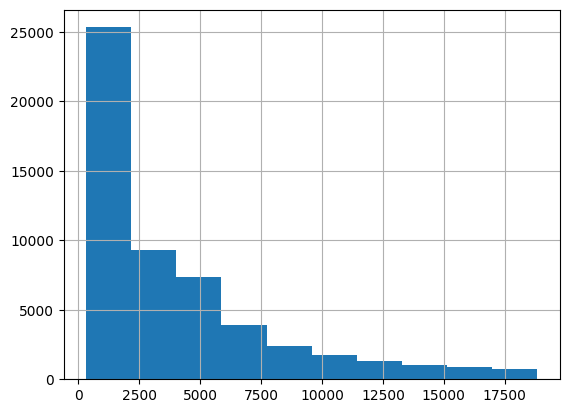

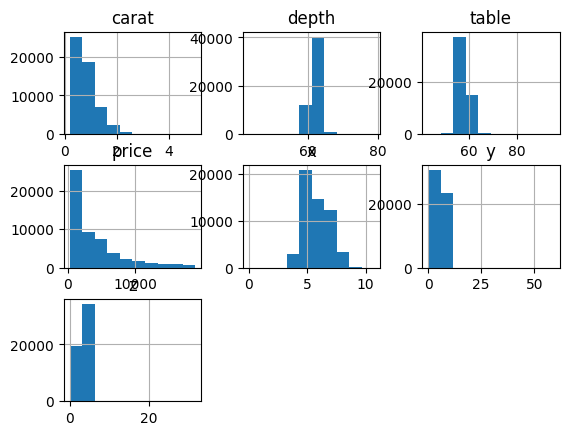

In [28]:
# Inspect histogram by numerical column
df['price'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

The price distribution indicates that diamonds can be relatively inexpensive or very costly, depending on various factors such as carat weight, cut, color, and clarity. The wide range in prices reflects the diverse quality and size of diamonds available in the dataset.

The length of diamonds varies, with most falling between 4.71 mm and 6.54 mm. The 0 mm value suggests data entry errors or missing values that need addressing.

The depth percentage is relatively consistent, with most diamonds having a depth around 61-62%. Depths below 50% or above 70% are outliers and might represent special cuts or errors.

The carat weight distribution shows that most diamonds are small, with 75% of them weighing 1.04 carats or less. Only a few diamonds exceed 5 carats, indicating rarity and potentially higher value for larger diamonds.

5. Initial Data Distribution for Categorical Columns

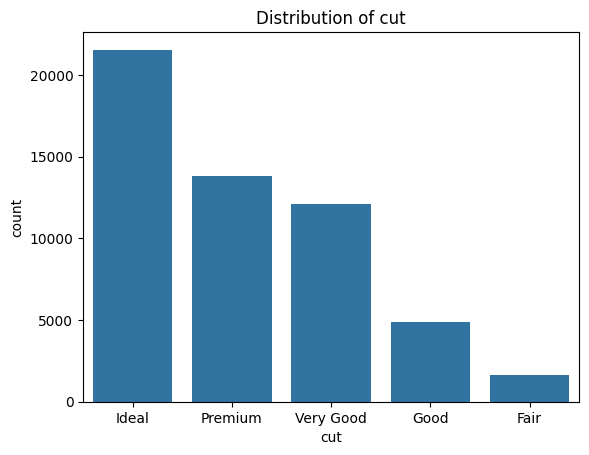

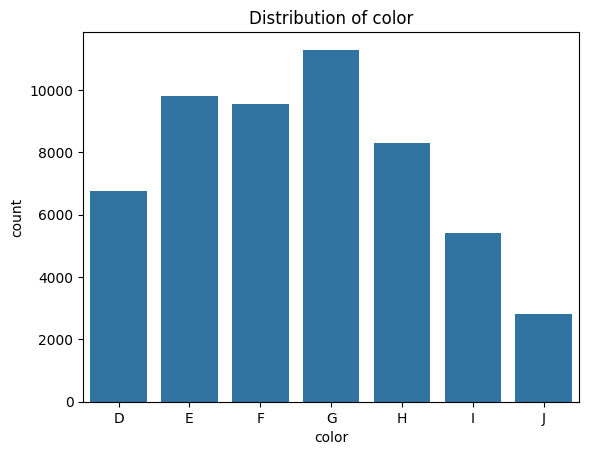

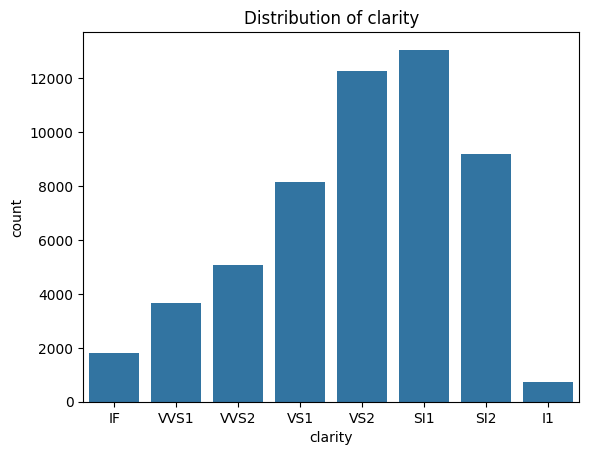

In [29]:
# Inspect value counts by categorical column
df['price'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

The distributions of cut, color, and clarity provide insights into the quality characteristics of the diamonds in the dataset:

Cut: Most diamonds have high-quality cuts (Ideal and Premium), indicating a preference for brilliance and aesthetic appeal.
Color: The majority of diamonds have color grades in the middle of the scale (G, H, I, J), suggesting a balance between quality and affordability.
Clarity: Diamonds with middle-range clarity grades (SI1, SI2, VS1, VS2) are more common, indicating a preference for diamonds with good clarity that are still affordable.


6. Other types of Visualizations

Relationship between Carat and Price

Goal: To examine the relationship between the carat (weight) of diamonds and their price.

Chart Type: Scatter Plot

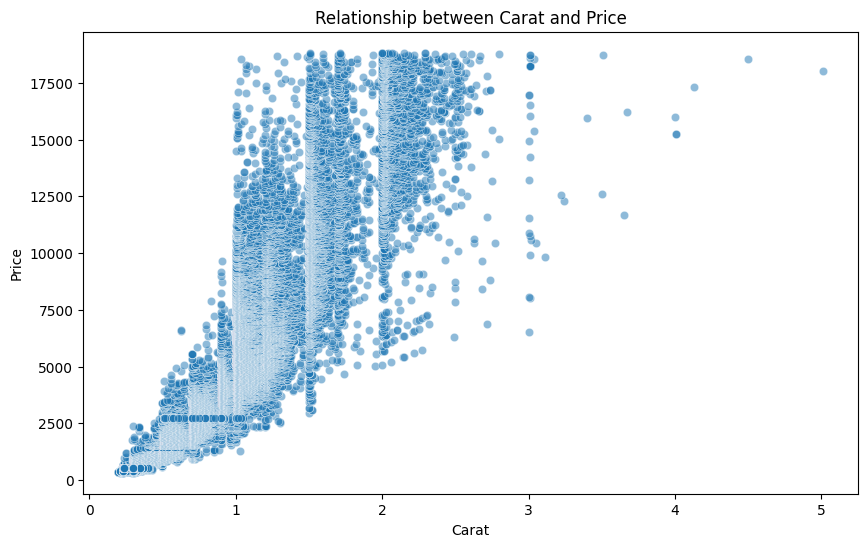

In [30]:
# Plotting a scatter plot for carat vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.5)
plt.title('Relationship between Carat and Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

The scatter plot reveals a positive correlation between the carat of a diamond and its price. As the carat increases, the price also tends to increase. However, there is considerable variability in price for diamonds of the same carat, indicating that other factors (such as cut, color, and clarity) also play significant roles in determining the price.

7. Price Distribution by Cut Quality

Goal: To compare the price distribution across different cut qualities of diamonds.

Chart Type: Box Plot

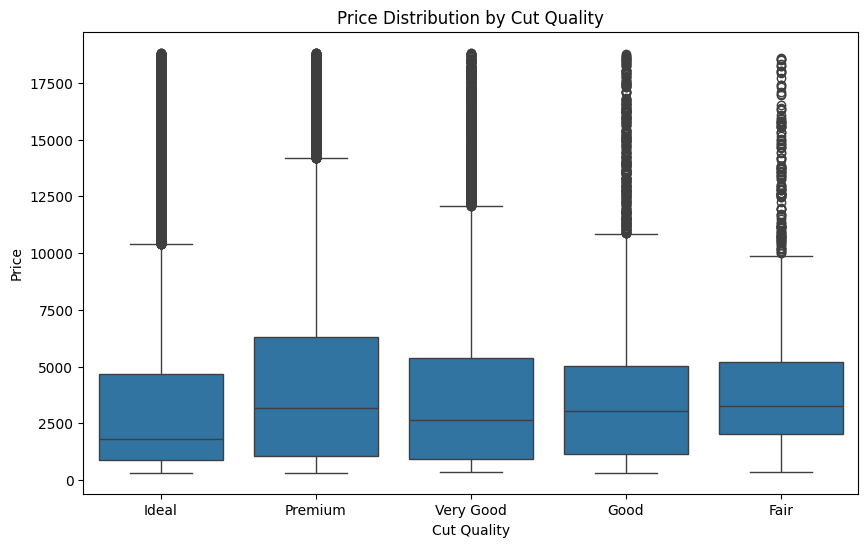

In [31]:
# Plotting a box plot for price distribution by cut quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Price Distribution by Cut Quality')
plt.xlabel('Cut Quality')
plt.ylabel('Price')
plt.show()

The box plot compares the price distribution for different cut qualities of diamonds. The "Ideal" and "Premium" cuts generally have higher median prices compared to the "Good", "Very Good", and "Fair" cuts. This suggests that better cut quality is associated with higher diamond prices. However, the presence of outliers indicates that there is still a wide range of prices within each cut category.

The histogram shows the distribution of diamond prices in the dataset. The prices are heavily skewed to the right, indicating that most diamonds are on the lower end of the price spectrum. There are a few diamonds with exceptionally high prices, which are represented by the long tail on the right side of the distribution.

8. Initial Data Preparation (or Data Preprocessing)

Renaming columns for clarity and consistency across the dataset.

In [32]:
# Renaming a column
df.rename(columns={'carat': 'Carat Weight'}, inplace=True)

# Display the first few rows to see the changes
print(df.head(10))

   Carat Weight        cut color clarity  depth  table  price     x     y  \
0          0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
5          0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96   
6          0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98   
7          0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11   
8          0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78   
9          0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
5  2.48  
6  2.47  
7  2.53  
8  2.49  
9  2.39  


8b. Adding a new column

In [33]:
# Adding a new column to convert price from USD to EUR
conversion_rate = 0.85
df['price_eur'] = df['price'] * conversion_rate

# Display the first few rows to see the changes
print(df.head(10))


   Carat Weight        cut color clarity  depth  table  price     x     y  \
0          0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
5          0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96   
6          0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98   
7          0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11   
8          0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78   
9          0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05   

      z  price_eur  
0  2.43     277.10  
1  2.31     277.10  
2  2.31     277.95  
3  2.63     283.90  
4  2.75     284.75  
5  2.48     285.60  
6  2.

This script provides a comprehensive overview and initial analysis of the 'diamonds.csv' dataset, making it easier to understand the data and identify areas for deeper exploration.